**R_network_analysis_test.R.ipynb** - play with R and large matrices, see how it goes.

# Notes

TODO:

- figure out a way to look at how similar node lists are between before and after

    - correlation of degree and binary degree vectors between before and after?
    - figure out way to spearate authors and sources... Maybe go through by type:
    
        - for authors, from each vector get IDs of all unknown plus all authors or both, make a set of all IDs that match from each time slice, then make a vector of all those ids' degrees and binary degrees from before and after.
        - same for sources.
- once I get daily data points, figure out a way to graph all the variables so I can look at them all together - on a single char doesn't work (scales are too different), but something so I can try to understand what is going on at each day over time.

# R network analysis files

Related files:

* network descriptives
    * network-level
        
        * files
            
            * R scripts:
                
                * `context_analysis/R/db_connect.r`
                * `context_analysis/R/sna/functions-sna.r`
                * `context_analysis/R/sna/NetworkInfo.r`
                * `context_analysis/R/sna/sna-load_data.r`
                * `context_analysis/R/sna/igraph/*`
                * `context_analysis/R/sna/statnet/*`
        
        * statnet/sna
            
            * `sna::gden()` - graph density
            * R scripts:
                
                * `context_analysis/R/sna/statnet/sna-statnet-init.r`
                * `context_analysis/R/sna/statnet/sna-statnet-network-stats.r`
                * `context_analysis/R/sna/statnet/sna-qap.r`
        
        * igraph
            
            * `igraph::transitivity()` - vector of transitivity scores for each node in a graph, plus network-level transitivity score.
                
                * Q - interpretation?
                
            * R scripts:
                
                * `context_analysis/R/sna/statnet/sna-igraph-init.r`
                * `context_analysis/R/sna/statnet/sna-igraph-network-stats.r`


# Setup

## Setup -  working directories

Store important directories and file names in variables:

In [1]:
getwd()

[1] "/home/jonathanmorgan/work/django/research/research/work/phd_work/analysis/network_data"

In [2]:
# code files (in particular SNA function library, modest though it may be)
base_code_directory <- "/home/jonathanmorgan/work/django/research/research/context_analysis/R"
sna_code_directory <- paste( base_code_directory, "/sna", sep = "" )
code_directory <- sna_code_directory

# home directory
home_directory <- getwd()
home_directory <- "/home/jonathanmorgan/work/django/research/research/work/phd_work/analysis/network_data"

# data directories
#data_directory <- paste( home_directory, "/data", sep = "" )
data_directory <- "/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month"
workspace_file_name <- "R_grp_network_analysis_test.RData"
workspace_file_path <- paste( data_directory, "/", workspace_file_name )

In [3]:
# set working directory to data directory for now.
setwd( data_directory )
getwd()

[1] "/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month"

## Setup - functions

### Setup - functions - import SNA functions

source the file `functions-sna.r`.

In [4]:
sna_function_file_path <- paste( sna_code_directory, "/", 'functions-sna.r', sep = "" )

In [5]:
source( sna_function_file_path )

### Setup - functions - import statnet functions

- Back to [Table of Contents](#Table-of-Contents)

source the file `statnet/functions-statnet.r`.  This file includes:

- `compareMatricesQAP()`, used extensively below.

In [9]:
#rm( compareMatricesQAP )

In [6]:
# statnet/sna functions
# - /home/jonathanmorgan/work/django/research/context_analysis/R/sna/stanet/functions-statnet.r
statnetFunctionFilePath <- paste( sna_code_directory, "/statnet/", 'functions-statnet.r', sep = "" )

In [7]:
source( statnetFunctionFilePath )

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


Loading required package: network


‘network’ 1.17.2 (2022-05-20), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


sna: Tools for Social Network Analysis
Version 2.7 created on 2022-05-09.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.




## Setup - ReferenceClasses

### Setup - ReferenceClass - NetworkInfo

In [10]:
rm( NetworkInfo )
rm( processBeforeAfterNetworks )

Warning message in rm(NetworkInfo):
“object 'NetworkInfo' not found”
Warning message in rm(processBeforeAfterNetworks):
“object 'processBeforeAfterNetworks' not found”


In [8]:
networkInfoClassFilePath <- paste( sna_code_directory, "/NetworkInfo.r", sep = "" )

In [9]:
source( networkInfoClassFilePath )

Loading required package: tergm

Loading required package: ergm


‘ergm’ 4.2.2 (2022-06-01), part of the Statnet Project
* ‘news(package="ergm")’ for changes since last version
* ‘citation("ergm")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


‘ergm’ 4 is a major update that introduces some backwards-incompatible
changes. Please type ‘news(package="ergm")’ for a list of major
changes.



Attaching package: ‘ergm’


The following object is masked from ‘package:statnet.common’:

    snctrl


Loading required package: networkDynamic


‘networkDynamic’ 0.11.2 (2022-05-04), part of the Statnet Project
* ‘news(package="networkDynamic")’ for changes since last version
* ‘citation("networkDynamic")’ for citation information
* ‘https://statnet.org’ for help, support, and other information


Registered S3 method overwritten by 'tergm':
  method                   from
  simulate_formula.network ergm


‘tergm’ 4.0.2 (2021-07-28), part of the Statnet Pr

## Setup - network data

### Setup - network data - notes: render and store network data

First, need render to render network data and upload it to your server.

Directions for creating network data: 

- network data creation example notebook: [analysis-network_data_output_example.ipynb](../analysis-network_data_output_example.ipynb)

    - this shows programmatic data creation using JSON file to capture request parameters.
    - includes all parameters and a few examples of different ways you can set parameters.

- actual network data creation notebook: [analysis-network_data_output-GRP.ipynb](./analysis-network_data_output-GRP.ipynb)

You want a tab-delimited matrix that includes both the network and attributes of nodes as columns, and you want it to include a header row.

Once you render your network data files, you should place them on the server.

High level data file layout:

- tab-delimited.
- first row and first column are labels
- last 2 columns are traits of nodes (`person_id` and `person_type`)
- each row and column after first until the trait columns represents a person found in one of the articles.
- The people are in the same order from top to bottom and left to right.
- Where the row and column of two people meet, and one of the people is an author, the nunber in the cell where they meet is the number of times the non-author was quoted in an article by the author.  Does not include more basic two-mode co-location ties (appeared in same article, even if not an author and/or not quoted).


# Actual processing using ReferenceClasses

## NetworkInfo - process single network

In [11]:
testNetworkInfo <- NetworkInfo()
testNetworkInfo$initFromTabData(
    data_directory,
    "grp_6mos_by_month_2010-05-05_pre-20220604-143216.tab"
)
testNetworkInfo$processNetwork()

Warning message in sna::gtrans(myNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but your data looks too large for that to work well.  Overriding to edgelist method.”


In [32]:
testNetworkInfo$myDegreeAverage

[1] 1.374573

In [39]:
testBinMatrix <- testNetworkInfo$getBinaryNetworkMatrix()

In [41]:
class( testBinMatrix )

[1] "matrix" "array"

In [17]:
max( testBinMatrix )

[1] 1

In [ ]:
testBinMatrix

In [19]:
testMatrix <- testNetworkInfo$myNetworkMatrix

In [42]:
class( testMatrix )

[1] "matrix" "array"

In [20]:
max( testMatrix )

[1] 57

In [ ]:
testMatrix

In [33]:
testNetworkInfo$myDegreeAverageAuthor2And4
testNetworkInfo$myDegreeAverageAuthorOnly2
testNetworkInfo$myDegreeAverageSource3And4
testNetworkInfo$myDegreeAverageSourceOnly3


[1] 60.1761

[1] 62.69536

[1] 1.268087

[1] 1.255901

In [34]:
testNetworkInfo$myAuthorCount2And4
testNetworkInfo$myAuthorCountOnly2
testNetworkInfo$mySourceCount3And4
testNetworkInfo$mySourceCountOnly3


[1] 159

[1] 151

[1] 7464

[1] 7456

In [35]:
testDataFileRow <- pairwiseComparisonDF[ 1, ]
testDataFileRow$beforeDegreeAverageAuthor2And4
testDataFileRow$beforeDegreeAverageAuthorOnly2
testDataFileRow$beforeDegreeAverageSource3And4
testDataFileRow$beforeDegreeAverageSourceOnly3


[1] 60.1761

[1] 62.69536

[1] 1.268087

[1] 1.255901

In [36]:
testNetworkInfo$calcMyAuthorCount( includeBothIN = TRUE )
testNetworkInfo$calcMyAuthorCount( includeBothIN = FALSE )
testNetworkInfo$calcMySourceCount( includeBothIN = TRUE )
testNetworkInfo$calcMySourceCount( includeBothIN = FALSE )

[1] 159

[1] 151

[1] 7464

[1] 7456

In [37]:
testNetworkInfo$calcMyAuthorMeanDegree( includeBothIN = TRUE )
testNetworkInfo$calcMyAuthorMeanDegree( includeBothIN = FALSE )
testNetworkInfo$calcMySourceMeanDegree( includeBothIN = TRUE )
testNetworkInfo$calcMySourceMeanDegree( includeBothIN = FALSE )

[1] 60.1761

[1] 62.69536

[1] 1.268087

[1] 1.255901

## NetworkBeforeAfterDatePair - process pair of networks

In [75]:
testNetworkInfoPre <- NetworkInfo()
testNetworkInfoPre$initFromTabData(
    data_directory,
    "grp_6mos_by_month_2010-05-05_pre-20220604-143216.tab"
)
#testNetworkInfo$processNetwork()

In [68]:
testNetworkInfoPost <- NetworkInfo()
testNetworkInfoPost$initFromTabData(
    data_directory,
    "grp_6mos_by_month_2010-05-05_post-20220604-143320.tab"
)
#testNetworkInfo$processNetwork()

In [85]:
preMatrix <- testNetworkInfoPre$myNetworkMatrix
postMatrix <- testNetworkInfoPost$myNetworkMatrix

In [84]:
preMatrix <- ifelse( preMatrix > 0, 1, 0 )
postMatrix <- ifelse( postMatrix > 0, 1, 0 )

In [86]:
preMatrix[ preMatrix > 0 ] <- 1
postMatrix[ postMatrix > 0 ] <- 1

In [92]:
preMatrix <- testNetworkInfoPre$getBinaryNetworkMatrix()
postMatrix <- testNetworkInfoPost$getBinaryNetworkMatrix()

In [91]:
class( preMatrix )
max( preMatrix )
nrow( preMatrix )
ncol( preMatrix )
class( postMatrix )
max( postMatrix )
nrow( postMatrix )
ncol( postMatrix )

[1] "refMethodDef"
attr(,"package")
[1] "methods"

ERROR: Error in max(preMatrix): invalid 'type' (closure) of argument


In [88]:
comparisonOutput <- compareMatricesQAP(
        preMatrix,
        postMatrix,
        outputPrefixIN = "grp_6mos_by_month",
        outputPlotsIN = FALSE,
        debugFlagIN = FALSE,
        repsIN = 10,
        doQapIN = FALSE )

==> Start of  compareMatricesQAP  at  2022-06-07 04:10:13

==> End of  compareMatricesQAP  at  2022-06-07 04:10:38



In [89]:
comparisonOutput

$graphCorrelation
[1] 0.1073471

$graphCovariance
[1] 1.471937e-05

$graphHammingDist
[1] 22990

## NetworkInfo - make data.frame of pair-wise comparisons

### test data

In [38]:
label <- c(
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month"
)

In [39]:
networkDuration <- c(
    "6mos",
    "6mos",
    "6mos",
    "6mos"
)

In [40]:
baseDate <- c(
    "2005-07-03",
    "2005-08-03",
    "2005-09-03",
    "2005-10-04"
)

In [41]:
beforeFile <- c(
    "grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab",
    "grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab",
    "grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab",
    "grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab"
)

In [42]:
afterFile <- c(
    "grp_6mos_by_month_2005-07-03_post-20220604-115928.tab",
    "grp_6mos_by_month_2005-08-03_post-20220604-120305.tab",
    "grp_6mos_by_month_2005-09-03_post-20220604-120639.tab",
    "grp_6mos_by_month_2005-10-04_post-20220604-121014.tab"
)

In [43]:
dataFileDF <- data.frame(
    baseDate,
    networkDuration,
    label,
    beforeFile,
    afterFile
)

In [60]:
label <- c(
    "grp_6mos_by_month"
)

In [61]:
networkDuration <- c(
    "6mos"
)

In [62]:
baseDate <- c(
    "2005-07-03"
)

In [63]:
beforeFile <- c(
    "grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab"
)

In [64]:
afterFile <- c(
    "grp_6mos_by_month_2005-07-03_post-20220604-115928.tab"
)

In [65]:
dataFileDF <- data.frame(
    baseDate,
    networkDuration,
    label,
    beforeFile,
    afterFile
)

In [72]:
dataFileDF

baseDate,networkDuration,label,beforeFile,afterFile
<chr>,<chr>,<chr>,<chr>,<chr>
2005-07-03,6mos,grp_6mos_by_month,grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab,grp_6mos_by_month_2005-07-03_post-20220604-115928.tab


### REAL DATA - make data frame of files to process

In [27]:
label <- c(
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month",
    "grp_6mos_by_month"
)

In [28]:
networkDuration <- c(
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos",
    "6mos"
)

In [29]:
baseDate <- c(
    "2005-07-03",
    "2005-08-03",
    "2005-09-03",
    "2005-10-04",
    "2005-11-04",
    "2005-12-05",
    "2006-01-05",
    "2006-02-05",
    "2006-03-08",
    "2006-04-08",
    "2006-05-09",
    "2006-06-09",
    "2006-07-10",
    "2006-08-10",
    "2006-09-10",
    "2006-10-11",
    "2006-11-11",
    "2006-12-12",
    "2007-01-12",
    "2007-02-12",
    "2007-03-15",
    "2007-04-15",
    "2007-05-16",
    "2007-06-16",
    "2007-07-17",
    "2007-08-17",
    "2007-09-17",
    "2007-10-18",
    "2007-11-18",
    "2007-12-19",
    "2008-01-19",
    "2008-02-19",
    "2008-03-21",
    "2008-04-21",
    "2008-05-22",
    "2008-06-22",
    "2008-07-23",
    "2008-08-23",
    "2008-09-23",
    "2008-10-24",
    "2008-11-24",
    "2008-12-25",
    "2009-01-25",
    "2009-02-25",
    "2009-03-28",
    "2009-04-28",
    "2009-05-29",
    "2009-06-29",
    "2009-07-30",
    "2009-08-30",
    "2009-09-30",
    "2009-10-31",
    "2009-12-01",
    "2010-01-01",
    "2010-02-01",
    "2010-03-04",
    "2010-04-04",
    "2010-05-05"
)

In [30]:
beforeFile <- c(
    "grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab",
    "grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab",
    "grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab",
    "grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab",
    "grp_6mos_by_month_2005-11-04_pre-20220604-121212.tab",
    "grp_6mos_by_month_2005-12-05_pre-20220604-121603.tab",
    "grp_6mos_by_month_2006-01-05_pre-20220604-121948.tab",
    "grp_6mos_by_month_2006-02-05_pre-20220604-122317.tab",
    "grp_6mos_by_month_2006-03-08_pre-20220604-122637.tab",
    "grp_6mos_by_month_2006-04-08_pre-20220604-122958.tab",
    "grp_6mos_by_month_2006-05-09_pre-20220604-123316.tab",
    "grp_6mos_by_month_2006-06-09_pre-20220604-123643.tab",
    "grp_6mos_by_month_2006-07-10_pre-20220604-123955.tab",
    "grp_6mos_by_month_2006-08-10_pre-20220604-124308.tab",
    "grp_6mos_by_month_2006-09-10_pre-20220604-124636.tab",
    "grp_6mos_by_month_2006-10-11_pre-20220604-124959.tab",
    "grp_6mos_by_month_2006-11-11_pre-20220604-125318.tab",
    "grp_6mos_by_month_2006-12-12_pre-20220604-125624.tab",
    "grp_6mos_by_month_2007-01-12_pre-20220604-125935.tab",
    "grp_6mos_by_month_2007-02-12_pre-20220604-130252.tab",
    "grp_6mos_by_month_2007-03-15_pre-20220604-130605.tab",
    "grp_6mos_by_month_2007-04-15_pre-20220604-130914.tab",
    "grp_6mos_by_month_2007-05-16_pre-20220604-131210.tab",
    "grp_6mos_by_month_2007-06-16_pre-20220604-131501.tab",
    "grp_6mos_by_month_2007-07-17_pre-20220604-131750.tab",
    "grp_6mos_by_month_2007-08-17_pre-20220604-132033.tab",
    "grp_6mos_by_month_2007-09-17_pre-20220604-132313.tab",
    "grp_6mos_by_month_2007-10-18_pre-20220604-132557.tab",
    "grp_6mos_by_month_2007-11-18_pre-20220604-132843.tab",
    "grp_6mos_by_month_2007-12-19_pre-20220604-133126.tab",
    "grp_6mos_by_month_2008-01-19_pre-20220604-133402.tab",
    "grp_6mos_by_month_2008-02-19_pre-20220604-133627.tab",
    "grp_6mos_by_month_2008-03-21_pre-20220604-133847.tab",
    "grp_6mos_by_month_2008-04-21_pre-20220604-134102.tab",
    "grp_6mos_by_month_2008-05-22_pre-20220604-134315.tab",
    "grp_6mos_by_month_2008-06-22_pre-20220604-134526.tab",
    "grp_6mos_by_month_2008-07-23_pre-20220604-134742.tab",
    "grp_6mos_by_month_2008-08-23_pre-20220604-134954.tab",
    "grp_6mos_by_month_2008-09-23_pre-20220604-135158.tab",
    "grp_6mos_by_month_2008-10-24_pre-20220604-135401.tab",
    "grp_6mos_by_month_2008-11-24_pre-20220604-135605.tab",
    "grp_6mos_by_month_2008-12-25_pre-20220604-135809.tab",
    "grp_6mos_by_month_2009-01-25_pre-20220604-140021.tab",
    "grp_6mos_by_month_2009-02-25_pre-20220604-140219.tab",
    "grp_6mos_by_month_2009-03-28_pre-20220604-140420.tab",
    "grp_6mos_by_month_2009-04-28_pre-20220604-140621.tab",
    "grp_6mos_by_month_2009-05-29_pre-20220604-140826.tab",
    "grp_6mos_by_month_2009-06-29_pre-20220604-141033.tab",
    "grp_6mos_by_month_2009-07-30_pre-20220604-141239.tab",
    "grp_6mos_by_month_2009-08-30_pre-20220604-141447.tab",
    "grp_6mos_by_month_2009-09-30_pre-20220604-141700.tab",
    "grp_6mos_by_month_2009-10-31_pre-20220604-141919.tab",
    "grp_6mos_by_month_2009-12-01_pre-20220604-142137.tab",
    "grp_6mos_by_month_2010-01-01_pre-20220604-142343.tab",
    "grp_6mos_by_month_2010-02-01_pre-20220604-142549.tab",
    "grp_6mos_by_month_2010-03-04_pre-20220604-142755.tab",
    "grp_6mos_by_month_2010-04-04_pre-20220604-143001.tab",
    "grp_6mos_by_month_2010-05-05_pre-20220604-143216.tab"
)

In [31]:
afterFile <- c(
    "grp_6mos_by_month_2005-07-03_post-20220604-115928.tab",
    "grp_6mos_by_month_2005-08-03_post-20220604-120305.tab",
    "grp_6mos_by_month_2005-09-03_post-20220604-120639.tab",
    "grp_6mos_by_month_2005-10-04_post-20220604-121014.tab",
    "grp_6mos_by_month_2005-11-04_post-20220604-121409.tab",
    "grp_6mos_by_month_2005-12-05_post-20220604-121756.tab",
    "grp_6mos_by_month_2006-01-05_post-20220604-122133.tab",
    "grp_6mos_by_month_2006-02-05_post-20220604-122459.tab",
    "grp_6mos_by_month_2006-03-08_post-20220604-122819.tab",
    "grp_6mos_by_month_2006-04-08_post-20220604-123139.tab",
    "grp_6mos_by_month_2006-05-09_post-20220604-123504.tab",
    "grp_6mos_by_month_2006-06-09_post-20220604-123819.tab",
    "grp_6mos_by_month_2006-07-10_post-20220604-124132.tab",
    "grp_6mos_by_month_2006-08-10_post-20220604-124452.tab",
    "grp_6mos_by_month_2006-09-10_post-20220604-124818.tab",
    "grp_6mos_by_month_2006-10-11_post-20220604-125140.tab",
    "grp_6mos_by_month_2006-11-11_post-20220604-125452.tab",
    "grp_6mos_by_month_2006-12-12_post-20220604-125757.tab",
    "grp_6mos_by_month_2007-01-12_post-20220604-130114.tab",
    "grp_6mos_by_month_2007-02-12_post-20220604-130429.tab",
    "grp_6mos_by_month_2007-03-15_post-20220604-130743.tab",
    "grp_6mos_by_month_2007-04-15_post-20220604-131043.tab",
    "grp_6mos_by_month_2007-05-16_post-20220604-131335.tab",
    "grp_6mos_by_month_2007-06-16_post-20220604-131627.tab",
    "grp_6mos_by_month_2007-07-17_post-20220604-131913.tab",
    "grp_6mos_by_month_2007-08-17_post-20220604-132154.tab",
    "grp_6mos_by_month_2007-09-17_post-20220604-132433.tab",
    "grp_6mos_by_month_2007-10-18_post-20220604-132722.tab",
    "grp_6mos_by_month_2007-11-18_post-20220604-133006.tab",
    "grp_6mos_by_month_2007-12-19_post-20220604-133245.tab",
    "grp_6mos_by_month_2008-01-19_post-20220604-133516.tab",
    "grp_6mos_by_month_2008-02-19_post-20220604-133737.tab",
    "grp_6mos_by_month_2008-03-21_post-20220604-133955.tab",
    "grp_6mos_by_month_2008-04-21_post-20220604-134209.tab",
    "grp_6mos_by_month_2008-05-22_post-20220604-134421.tab",
    "grp_6mos_by_month_2008-06-22_post-20220604-134635.tab",
    "grp_6mos_by_month_2008-07-23_post-20220604-134850.tab",
    "grp_6mos_by_month_2008-08-23_post-20220604-135057.tab",
    "grp_6mos_by_month_2008-09-23_post-20220604-135300.tab",
    "grp_6mos_by_month_2008-10-24_post-20220604-135504.tab",
    "grp_6mos_by_month_2008-11-24_post-20220604-135707.tab",
    "grp_6mos_by_month_2008-12-25_post-20220604-135915.tab",
    "grp_6mos_by_month_2009-01-25_post-20220604-140120.tab",
    "grp_6mos_by_month_2009-02-25_post-20220604-140318.tab",
    "grp_6mos_by_month_2009-03-28_post-20220604-140520.tab",
    "grp_6mos_by_month_2009-04-28_post-20220604-140722.tab",
    "grp_6mos_by_month_2009-05-29_post-20220604-140928.tab",
    "grp_6mos_by_month_2009-06-29_post-20220604-141135.tab",
    "grp_6mos_by_month_2009-07-30_post-20220604-141342.tab",
    "grp_6mos_by_month_2009-08-30_post-20220604-141552.tab",
    "grp_6mos_by_month_2009-09-30_post-20220604-141809.tab",
    "grp_6mos_by_month_2009-10-31_post-20220604-142029.tab",
    "grp_6mos_by_month_2009-12-01_post-20220604-142240.tab",
    "grp_6mos_by_month_2010-01-01_post-20220604-142446.tab",
    "grp_6mos_by_month_2010-02-01_post-20220604-142653.tab",
    "grp_6mos_by_month_2010-03-04_post-20220604-142858.tab",
    "grp_6mos_by_month_2010-04-04_post-20220604-143107.tab",
    "grp_6mos_by_month_2010-05-05_post-20220604-143320.tab"
)

In [32]:
dataFileDF <- data.frame(
    baseDate,
    networkDuration,
    label,
    beforeFile,
    afterFile
)

### Build data.frame of network data

In [18]:
nrow( dataFileDF )

[1] 58

In [84]:
pairwiseComparisonDF <- NULL

In [85]:
# loop over data files
for( i in 1 : nrow( dataFileDF ) ) {

    # get current row
    dataFileRow <- dataFileDF[ i, ]
    
    # retrieve fields
    myBeforeFile <- dataFileRow$beforeFile
    myAfterFile <- dataFileRow$afterFile
    myBaseDate <- dataFileRow$baseDate
    myNetworkDuration <- dataFileRow$networkDuration
    myLabel <- dataFileRow$label
    
    message(
        paste(
            "====> ",
            myLabel,
            " - ",
            myBaseDate,
            " ( ",
            myNetworkDuration,
            " ) - before: ",
            myBeforeFile,
            "; after: ",
            myAfterFile,
            " @ ",
            Sys.time(),
            sep = ""
        )
    )

    # process and compare the before and after networks.
    pairwiseComparison <- processBeforeAfterNetworks(
        beforeDataDirectoryIN = data_directory,
        beforeFileIN = myBeforeFile,
        afterDataDirectoryIN = data_directory,
        afterFileIN = myAfterFile,
        dateIN = myBaseDate,
        networkDurationIN = myNetworkDuration,
        labelIN = myLabel,
        debugFlagIN = FALSE
    )

    # add them to the output data.frame.
    if ( is.null( pairwiseComparisonDF ) == TRUE ){

        # make a new data.frame with first row encountered.
        pairwiseComparisonDF <- data.frame( pairwiseComparison )
    
    } else {
    
        # update data.frame to include latest row.
        pairwiseComparisonDF <- rbind( pairwiseComparisonDF, pairwiseComparison )

    } #-- END check if output data.frame is NULL --#

}

====> grp_6mos_by_month - 2005-07-03 ( 6mos ) - before: grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab; after: grp_6mos_by_month_2005-07-03_post-20220604-115928.tab @ 2022-06-06 04:45:21

Warning message in sna::gtrans(myNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but your data looks too large for that to work well.  Overriding to edgelist method.”
Warning message in sna::gtrans(myNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but your data looks too large for that to work well.  Overriding to edgelist method.”
==> Start of  compareMatricesQAP  at  2022-06-06 04:50:21

==> End of  compareMatricesQAP  at  2022-06-06 04:51:27

====> grp_6mos_by_month - 2005-08-03 ( 6mos ) - before: grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab; after: grp_6mos_by_month_2005-08-03_post-20220604-120305.tab @ 2022-06-06 04:51:27

Warning message in sna::gtrans(myNetworkStatnet, mode = "graph"):
“gtrans called with use.adjacency=TRUE, but yo

In [19]:
nrow( pairwiseComparisonDF )

[1] 58

In [15]:
pairwiseComparisonDF

baseDate,networkDuration,label,beforeAuthorCount2And4,beforeAuthorCountOnly2,beforeBetweennessCentrality,beforeConnectedness,beforeColumnCount,beforeDataFileName,beforeDataPath,⋯,afterRowCount,afterSourceCount3And4,afterSourceCountOnly3,afterTransitivity,graphCorrelation,graphCovariance,graphHammingDistance,binGraphCorrelation,binGraphCovariance,binGraphHammingDistance
<date>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2005-07-03,6mos,grp_6mos_by_month,159,151,0.03663406,0.2940678,13775,grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab,⋯,13773,7601,7593,0.003357679,0.4569920,1.899087e-04,45358,0.11059698,1.109275e-05,33842
2005-08-03,6mos,grp_6mos_by_month,160,152,0.03495803,0.3091478,13827,grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab,⋯,13825,7461,7451,0.003507436,0.4503089,1.908685e-04,45772,0.11349380,1.135477e-05,33904
2005-09-03,6mos,grp_6mos_by_month,158,146,0.03780139,0.3277417,13878,grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab,⋯,13876,7288,7281,0.003824530,0.4207205,1.788617e-04,46714,0.10745234,1.068976e-05,34214
2005-10-04,6mos,grp_6mos_by_month,158,148,0.03969569,0.3325601,13713,grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab,⋯,13711,7126,7118,0.003878929,0.4142370,1.762767e-04,46238,0.11130250,1.124644e-05,33802
2005-11-04,6mos,grp_6mos_by_month,161,149,0.03528556,0.3409169,13501,grp_6mos_by_month_2005-11-04_pre-20220604-121212.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-11-04_pre-20220604-121212.tab,⋯,13499,6967,6960,0.003454774,0.4170922,1.805838e-04,45900,0.10786637,1.106464e-05,33416
2005-12-05,6mos,grp_6mos_by_month,166,155,0.03338141,0.3385650,13438,grp_6mos_by_month_2005-12-05_pre-20220604-121603.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-12-05_pre-20220604-121603.tab,⋯,13436,6899,6892,0.003483997,0.4107850,1.741603e-04,45370,0.10847303,1.114655e-05,33142
2006-01-05,6mos,grp_6mos_by_month,166,158,0.03253381,0.3256306,13222,grp_6mos_by_month_2006-01-05_pre-20220604-121948.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-01-05_pre-20220604-121948.tab,⋯,13220,6919,6911,0.003653799,0.4245886,1.861005e-04,45090,0.10936852,1.143365e-05,32574
2006-02-05,6mos,grp_6mos_by_month,169,159,0.04372529,0.3202009,13095,grp_6mos_by_month_2006-02-05_pre-20220604-122317.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-02-05_pre-20220604-122317.tab,⋯,13093,6893,6887,0.003951183,0.4016676,1.752257e-04,44780,0.10815866,1.139989e-05,32250
2006-03-08,6mos,grp_6mos_by_month,166,160,0.05020973,0.3193609,12891,grp_6mos_by_month_2006-03-08_pre-20220604-122637.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-03-08_pre-20220604-122637.tab,⋯,12889,6764,6758,0.003888655,0.3701014,1.646830e-04,44578,0.10492004,1.114975e-05,31640


In [59]:
testPairwiseComparisonDF <- pairwiseComparisonDF

### Create extra binGraph* columns that I forgot 

In [97]:
binaryComparisonDF <- NULL

In [98]:
# loop over data files
for( i in 1 : nrow( dataFileDF ) ) {

    # get current row
    dataFileRow <- dataFileDF[ i, ]
    
    # retrieve fields
    myBeforeFile <- dataFileRow$beforeFile
    myAfterFile <- dataFileRow$afterFile
    myBaseDate <- dataFileRow$baseDate
    myNetworkDuration <- dataFileRow$networkDuration
    myLabel <- dataFileRow$label
    
    message(
        paste(
            "====> ",
            myLabel,
            " - ",
            myBaseDate,
            " ( ",
            myNetworkDuration,
            " ) - before: ",
            myBeforeFile,
            "; after: ",
            myAfterFile,
            " @ ",
            Sys.time(),
            sep = ""
        )
    )

    # process and compare the before and after networks.
    binaryComparison <- beforeAfterBinaryNetworks(
        beforeDataDirectoryIN = data_directory,
        beforeFileIN = myBeforeFile,
        afterDataDirectoryIN = data_directory,
        afterFileIN = myAfterFile,
        dateIN = myBaseDate,
        networkDurationIN = myNetworkDuration,
        labelIN = myLabel,
        debugFlagIN = FALSE
    )

    # add them to the output data.frame.
    if ( is.null( binaryComparisonDF ) == TRUE ){

        # make a new data.frame with first row encountered.
        binaryComparisonDF <- data.frame( binaryComparison )
    
    } else {
    
        # update data.frame to include latest row.
        binaryComparisonDF <- rbind( binaryComparisonDF, binaryComparison )

    } #-- END check if output data.frame is NULL --#

}

====> grp_6mos_by_month - 2005-07-03 ( 6mos ) - before: grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab; after: grp_6mos_by_month_2005-07-03_post-20220604-115928.tab @ 2022-06-07 04:17:29

==> Start of  compareMatricesQAP  at  2022-06-07 04:19:38

==> End of  compareMatricesQAP  at  2022-06-07 04:21:40

====> grp_6mos_by_month - 2005-08-03 ( 6mos ) - before: grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab; after: grp_6mos_by_month_2005-08-03_post-20220604-120305.tab @ 2022-06-07 04:21:40

==> Start of  compareMatricesQAP  at  2022-06-07 04:23:56

==> End of  compareMatricesQAP  at  2022-06-07 04:25:04

====> grp_6mos_by_month - 2005-09-03 ( 6mos ) - before: grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab; after: grp_6mos_by_month_2005-09-03_post-20220604-120639.tab @ 2022-06-07 04:25:04

==> Start of  compareMatricesQAP  at  2022-06-07 04:27:17

==> End of  compareMatricesQAP  at  2022-06-07 04:28:34

====> grp_6mos_by_month - 2005-10-04 ( 6mos ) - before: grp_6mos_by_mo

In [11]:
nrow( binaryComparisonDF )

[1] 58

In [12]:
binaryComparisonDF

baseDate,networkDuration,label,beforeColumnCount,beforeDataFileName,beforeDataPath,beforeRowCount,afterColumnCount,afterDataFileName,afterDataPath,afterRowCount,binGraphCorrelation,binGraphCovariance,binGraphHammingDistance
<date>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
2005-07-03,6mos,grp_6mos_by_month,13775,grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-07-03_pre-20220604-115739.tab,13773,13775,grp_6mos_by_month_2005-07-03_post-20220604-115928.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-07-03_post-20220604-115928.tab,13773,0.11059698,1.109275e-05,33842
2005-08-03,6mos,grp_6mos_by_month,13827,grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-08-03_pre-20220604-120117.tab,13825,13827,grp_6mos_by_month_2005-08-03_post-20220604-120305.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-08-03_post-20220604-120305.tab,13825,0.11349380,1.135477e-05,33904
2005-09-03,6mos,grp_6mos_by_month,13878,grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-09-03_pre-20220604-120452.tab,13876,13878,grp_6mos_by_month_2005-09-03_post-20220604-120639.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-09-03_post-20220604-120639.tab,13876,0.10745234,1.068976e-05,34214
2005-10-04,6mos,grp_6mos_by_month,13713,grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-10-04_pre-20220604-120827.tab,13711,13713,grp_6mos_by_month_2005-10-04_post-20220604-121014.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-10-04_post-20220604-121014.tab,13711,0.11130250,1.124644e-05,33802
2005-11-04,6mos,grp_6mos_by_month,13501,grp_6mos_by_month_2005-11-04_pre-20220604-121212.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-11-04_pre-20220604-121212.tab,13499,13501,grp_6mos_by_month_2005-11-04_post-20220604-121409.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-11-04_post-20220604-121409.tab,13499,0.10786637,1.106464e-05,33416
2005-12-05,6mos,grp_6mos_by_month,13438,grp_6mos_by_month_2005-12-05_pre-20220604-121603.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-12-05_pre-20220604-121603.tab,13436,13438,grp_6mos_by_month_2005-12-05_post-20220604-121756.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2005-12-05_post-20220604-121756.tab,13436,0.10847303,1.114655e-05,33142
2006-01-05,6mos,grp_6mos_by_month,13222,grp_6mos_by_month_2006-01-05_pre-20220604-121948.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-01-05_pre-20220604-121948.tab,13220,13222,grp_6mos_by_month_2006-01-05_post-20220604-122133.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-01-05_post-20220604-122133.tab,13220,0.10936852,1.143365e-05,32574
2006-02-05,6mos,grp_6mos_by_month,13095,grp_6mos_by_month_2006-02-05_pre-20220604-122317.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-02-05_pre-20220604-122317.tab,13093,13095,grp_6mos_by_month_2006-02-05_post-20220604-122459.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-02-05_post-20220604-122459.tab,13093,0.10815866,1.139989e-05,32250
2006-03-08,6mos,grp_6mos_by_month,12891,grp_6mos_by_month_2006-03-08_pre-20220604-122637.tab,/home/jonathanmorgan/shares/phd_work/network_data/grp_6mos_by_month/grp_6mos_by_month_2006-03-

In [13]:
testBinaryComparisonDF <- binaryComparisonDF

In [14]:
# add the "binGraph*" columns to the pairwiseComparisonDF using cbind
binGraphCorrelation <- binaryComparisonDF$binGraphCorrelation
binGraphCovariance <- binaryComparisonDF$binGraphCovariance
binGraphHammingDistance <- binaryComparisonDF$binGraphHammingDistance

pairwiseComparisonDF <- cbind(
    pairwiseComparisonDF,
    binGraphCorrelation,
    binGraphCovariance,
    binGraphHammingDistance
)

In [16]:
# correlate between correlation coefficients
cor( pairwiseComparisonDF$graphCorrelation, pairwiseComparisonDF$binGraphCorrelation )

[1] 0.5007879

# graphing data

Notes:

- https://statisticsglobe.com/plot-all-columns-of-data-frame-in-r
- https://ggplot2.tidyverse.org/
- https://r-graphics.org/recipe-line-graph-basic-line
- https://r4ds.had.co.nz/data-visualisation.html

## graphCorrelation

In [90]:
# should do this as root, so it is installed system-wide.
#install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("ggplot2"): unable to install packages


In [91]:
library( ggplot2 )

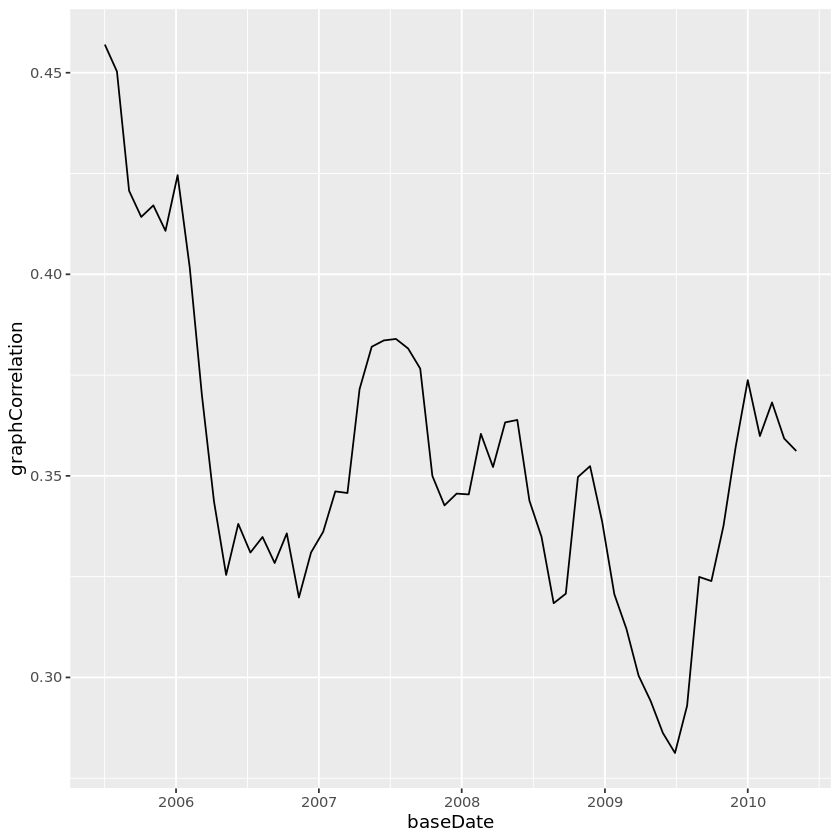

In [93]:
# simple plot using ggplot2
#install.packages("ggplot2")

ggplot( pairwiseComparisonDF, aes( baseDate, graphCorrelation ) ) + geom_line()

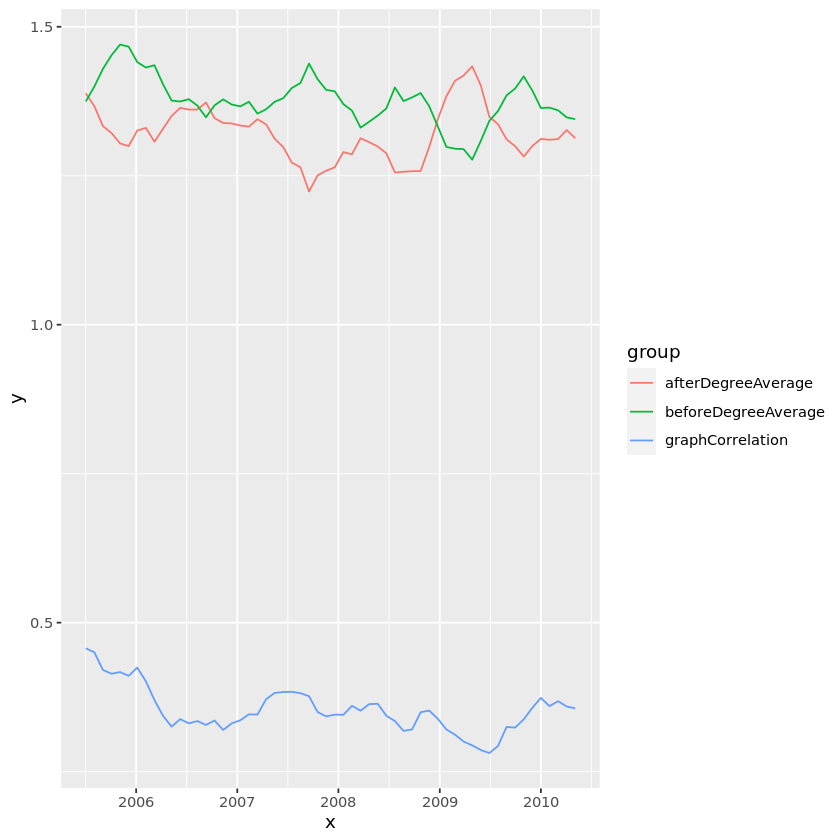

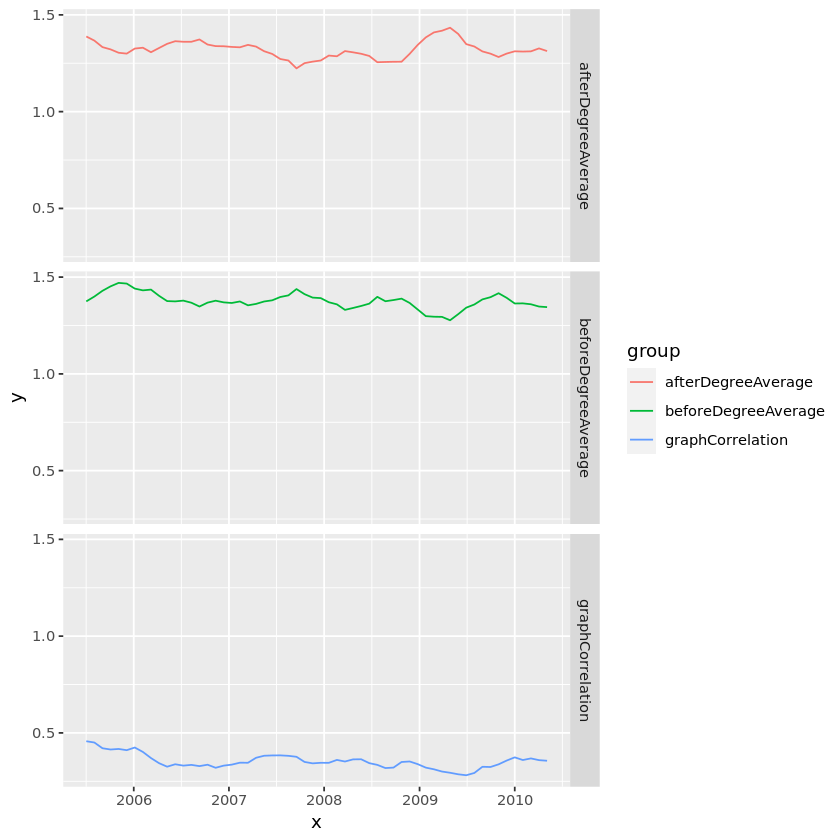

In [94]:
# multiple lines in separate graphs in one plot:
network_ggp_df <- data.frame( x = pairwiseComparisonDF$baseDate,                            # Reshape data frame
                              y = c(pairwiseComparisonDF$beforeDegreeAverage, pairwiseComparisonDF$graphCorrelation, pairwiseComparisonDF$afterDegreeAverage),
                              group = c(rep("beforeDegreeAverage", nrow(pairwiseComparisonDF)),
                                        rep("graphCorrelation", nrow(pairwiseComparisonDF)),
                                        rep("afterDegreeAverage", nrow(pairwiseComparisonDF))))

# draw multiple lines, one graph
ggp <- ggplot( network_ggp_df, aes( x, y, col = group ) ) + geom_line()
ggp

# each line in a separate graph, graphs stacked together
ggp + facet_grid(group ~ .) 

## binGraphCorrelation

In [90]:
# should do this as root, so it is installed system-wide.
#install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("ggplot2"):
“'lib = "/usr/local/lib/R/site-library"' is not writable”


ERROR: Error in install.packages("ggplot2"): unable to install packages


In [100]:
library( ggplot2 )

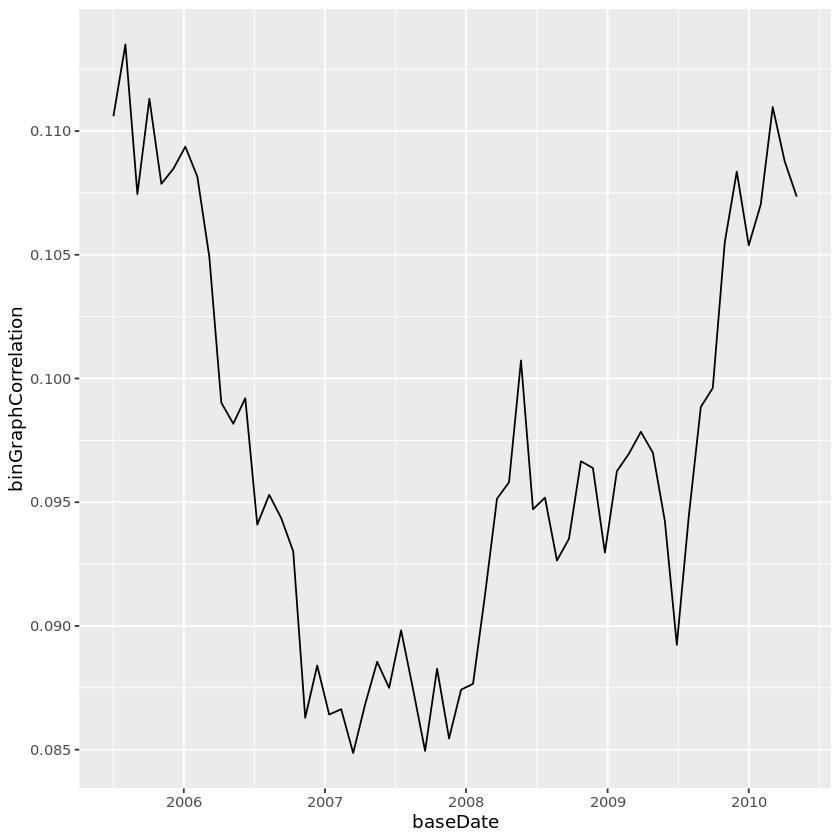

In [102]:
# simple plot using ggplot2
#install.packages("ggplot2")

ggplot( binaryComparisonDF, aes( baseDate, binGraphCorrelation ) ) + geom_line()

# memory management

In [ ]:
sort(sapply(ls(), function(x) format(object.size(get(x)), unit = 'auto')))

In [ ]:
rm( testNetworkInfo )
rm( testNetworkPair )
gc()

# Workspace

## Workspace - load workspace (optional)

If you want, you can load this file's workspace, from a previous run:

In [10]:
# assumes that you've already set working directory above to the
#     working directory.
setwd( data_directory )
load( workspace_file_name )

## Workspace - Save workspace image

- Back to [Table of Contents](#Table-of-Contents)

Save all the information in the current image, in case we need/want it later.

In [17]:
# help( save.image )
message( paste( "Output workspace to: ", workspace_file_name, sep = "" ) )
save.image( file = workspace_file_name )

Output workspace to: R_grp_network_analysis_test.RData



# Appendices

## Appendix - Example single network analysis

### `test` - loading large network matrix

First, we'll just try to load a 5 GB network matrix (all people from entire time, ties from articles in 2005).

In [ ]:
# initialize variables
testDataFolder <- data_directory
testDataFile <- "all_grp_hard_news_2005-20220603-015300.txt"
testDataPath <- paste( testDataFolder, "/", testDataFile, sep = "" )

In [ ]:
testDataPath

Load the data file into memory

In [ ]:
# tab-delimited:
testDataDF <- read.delim( testDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [ ]:
# get count of rows...
testRowCount <- nrow( testDataDF )
paste( "test row count = ", testRowCount, sep = "" )

# ...and columns
testColumnCount <- ncol( testDataDF )
paste( "test column count = ", testColumnCount, sep = "" )

Get just the tie rows and columns for initializing network libraries.

In [ ]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
testNetworkDF <- testDataDF[ , 1 : testRowCount ]
#str( testNetworkDF )

In [ ]:
# convert to a matrix
testNetworkMatrix <- as.matrix( testNetworkDF )
# str( testNetworkMatrix )

### `test` - initialize statnet

- Back to [Table of Contents](#Table-of-Contents)

First, load the statnet package, then load the automated grp_month data into statnet object and assign attributes to nodes.

Based on `context_text/R/sna/statnet/sna-statnet-init.r`.

In [ ]:
# make sure you've loaded the statnet library
#install.packages( "statnet" )
library( statnet )

In [ ]:
# If you have a data frame of attributes (each attribute is a column, with
#     attribute name the column name), you can associate those attributes
#     when you create the network.
# attribute help: http://www.inside-r.org/packages/cran/network/docs/loading.attributes

# load attributes from a file:
#tab_attribute_test1 <- read.delim( "tab-test1-attribute_data.txt", header = TRUE, row.names = 1, check.names = FALSE )

# or create DataFrame by just grabbing the attribute columns
testNetworkAttributeDF <- testDataDF[ , ( testColumnCount - 1 ) : testColumnCount ]

# convert matrix to statnet network object instance.
testNetworkStatnet <- network( testNetworkMatrix, matrix.type = "adjacency", directed = FALSE, vertex.attr = testNetworkAttributeDF )

# look at information now.
testNetworkStatnet

# Network attributes:
#  vertices = 314
#  directed = FALSE
#  hyper = FALSE
#  loops = FALSE
#  multiple = FALSE
#  bipartite = FALSE
#  total edges= 309
#    missing edges= 0
#    non-missing edges= 309
#
# Vertex attribute names:
#    person_type vertex.names
#
# No edge attributes


### `test` - Basic metrics

- Back to [Table of Contents](#Table-of-Contents)

In [ ]:
# assuming that our statnet network object is in reference test1_statnet.

# Use the degree function in the sna package to create vector of degree values
#    for each node.  Make sure to pass the gmode parameter to tell it that the
#    graph is not directed (gmode = "graph", instead of "digraph").
# Doc: http://www.inside-r.org/packages/cran/sna/docs/degree
#degree_vector <- degree( test1_statnet, gmode = "graph" )

# If you have other libraries loaded that also implement a degree function, you
#    can also call this with package name:
testDegreeVector <- sna::degree( testNetworkStatnet, gmode = "graph" )

# output the vector
#testDegreeVector

# want more info on the degree function?  You can get to it eventually through
#    the following:
#help( package = "sna" )
#??sna::degree

# what is the average (mean) degree?
testAvgDegree <- mean( testDegreeVector )
paste( "average degree = ", testAvgDegree, sep = "" )

# subset vector to get only those that are above mean
testAboveMeanVector <- testDegreeVector[ testDegreeVector > testAvgDegree ]

# Take the degree and associate it with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
testNetworkStatnet %v% "degree" <- testDegreeVector

# also add degree vector to original data frame
testDataDF$degree <- testDegreeVector


In [ ]:
# average author degree (person types 2 and 4)
testAverageAuthorDegree2And4 <- calcAuthorMeanDegree( dataFrameIN = testDataDF, includeBothIN = TRUE )
paste( "average author degree (2 and 4) = ", testAverageAuthorDegree2And4, sep = "" )

# average author degree (person type 2 only)
testAverageAuthorDegreeOnly2 <- calcAuthorMeanDegree( dataFrameIN = testDataDF, includeBothIN = FALSE )
paste( "average author degree (only 2) = ", testAverageAuthorDegreeOnly2, sep = "" )

# average source degree (person types 3 and 4)
testAverageSourceDegree3And4 <- calcSourceMeanDegree( dataFrameIN = testDataDF, includeBothIN = TRUE )
paste( "average source degree (3 and 4) = ", testAverageSourceDegree3And4, sep = "" )

# average source degree (person type 3 only)
testAverageSourceDegreeOnly3 <- calcSourceMeanDegree( dataFrameIN = testDataDF, includeBothIN = FALSE )
paste( "average source degree (only 3) = ", testAverageSourceDegreeOnly3, sep = "" )


### `test` - More metrics

- Back to [Table of Contents](#Table-of-Contents)

Now that we have the data in statnet object, run the code in the following for more in-depth information:

* `context_text/R/sna/statnet/sna-statnet-network-stats.r`

In [ ]:
# Links:
# - manual (PDF): http://cran.r-project.org/web/packages/sna/sna.pdf
# - good notes: http://www.shizukalab.com/toolkits/sna/node-level-calculations

# Also, be advised that statnet and igraph don't really play nice together.
#    If you'll be using both, best idea is to have a workspace for each.

#==============================================================================#
# statnet
#==============================================================================#

# make sure you've loaded the statnet library (includes sna)
# install.packages( "statnet" )
#library( statnet )

#==============================================================================#
# NODE level
#==============================================================================#

# what is the standard deviation of the degrees?
testDegreeSd <- sd( testDegreeVector )
paste( "degree SD = ", testDegreeSd, sep = "" )

# what is the variance of the degrees?
testDegreeVar <- var( testDegreeVector )
paste( "degree variance = ", testDegreeVar, sep = "" )

# what is the max value among the degrees?
testDegreeMax <- max( testDegreeVector )
paste( "degree max = ", testDegreeMax, sep = "" )

# calculate and plot degree distributions
testDegreeFrequenciesTable <- table( testDegreeVector )
paste( "degree frequencies = ", testDegreeFrequenciesTable, sep = "" )
testDegreeFrequenciesTable

# node-level undirected betweenness
testBetweenness <- sna::betweenness( testNetworkStatnet, gmode = "graph", cmode = "undirected" )

#paste( "betweenness = ", testBetweenness, sep = "" )
# associate with each node as a node attribute.
#    (%v% is a shortcut for the get.vertex.attribute command)
testNetworkStatnet %v% "betweenness" <- testBetweenness

# also add degree vector to original data frame
testDataDF$betweenness <- testBetweenness

#==============================================================================#
# NETWORK level
#==============================================================================#

# graph-level degree centrality
testDegreeCentrality <- sna::centralization( testNetworkStatnet, sna::degree, mode = "graph" )
paste( "degree centrality = ", testDegreeCentrality, sep = "" )

# graph-level betweenness centrality
testBetweennessCentrality <- sna::centralization( testNetworkStatnet, sna::betweenness, mode = "graph", cmode = "undirected" )
paste( "betweenness centrality = ", testBetweennessCentrality, sep = "" )

# graph-level connectedness
testConnectedness <- sna::connectedness( testNetworkStatnet )
paste( "connectedness = ", testConnectedness, sep = "" )

# graph-level transitivity
testTransitivity <- sna::gtrans( testNetworkStatnet, mode = "graph" )
paste( "transitivity = ", testTransitivity, sep = "" )

# graph-level density
testDensity <- sna::gden( testNetworkStatnet, mode = "graph" )
paste( "density = ", testDensity, sep = "" )


### `test` - create node attribute DataFrame

- Back to [Table of Contents](#Table-of-Contents)

If you want to just work with the traits of the nodes/vertexes, you can combine the attribute vectors into a data frame.

In [ ]:
#==============================================================================#
# output attributes to data frame
#==============================================================================#

# if you want to just work with the traits of the nodes/vertexes, you can
#    combine the attribute vectors into a data frame.

# first, output network object to see what attributes you have
testNetworkStatnet

# then, combine them into a data frame.
testNodeAttrDF <- data.frame( id = testNetworkStatnet %v% "vertex.names",
                                     person_id = testNetworkStatnet %v% "person_id",
                                     person_type = testNetworkStatnet %v% "person_type",
                                     degree = testNetworkStatnet %v% "degree",
                                     betweenness = testNetworkStatnet %v% "betweenness" )


## Appendix - QAP network correlation

### Load matrix 1 - before

In [ ]:
# initialize variables
beforeDataFolder <- data_directory
beforeDataFile <- "grp_6mos_by_month_2006-06-09_pre-20220604-044842.tab"
beforeDataPath <- paste( beforeDataFolder, "/", beforeDataFile, sep = "" )

In [ ]:
beforeDataPath

Load the data file into memory

In [ ]:
# tab-delimited:
beforeDataDF <- read.delim( beforeDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [ ]:
# get count of rows...
beforeRowCount <- nrow( beforeDataDF )
paste( "before row count = ", beforeRowCount, sep = "" )

# ...and columns
beforeColumnCount <- ncol( beforeDataDF )
paste( "before column count = ", beforeColumnCount, sep = "" )

Get just the tie rows and columns for initializing network libraries.

In [ ]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
beforeNetworkDF <- beforeDataDF[ , 1 : beforeRowCount ]
#str( beforeNetworkDF )

In [ ]:
# convert to a matrix
beforeNetworkMatrix <- as.matrix( beforeNetworkDF )
# str( beforeNetworkMatrix )

### Load matrix 2 - after

In [ ]:
# initialize variables
afterDataFolder <- data_directory
afterDataFile <- "grp_6mos_by_month_2006-06-09_post-20220604-045115.tab"
afterDataPath <- paste( afterDataFolder, "/", afterDataFile, sep = "" )

In [ ]:
afterDataPath

Load the data file into memory

In [ ]:
# tab-delimited:
afterDataDF <- read.delim( afterDataPath, header = TRUE, row.names = 1, check.names = FALSE )

In [ ]:
# get count of rows...
afterRowCount <- nrow(afterDataDF )
paste( "after row count = ", afterRowCount, sep = "" )

# ...and columns
afterColumnCount <- ncol( afterDataDF )
paste( "after column count = ", afterColumnCount, sep = "" )

Get just the tie rows and columns for initializing network libraries.

In [ ]:
# the below syntax returns only as many columns as there are rows, so
#     omitting any trait columns that lie in columns on the right side
#     of the file.
afterNetworkDF <- afterDataDF[ , 1 : afterRowCount ]
#str( afterNetworkDF )

In [ ]:
# convert to a matrix
afterNetworkMatrix <- as.matrix( afterNetworkDF )
# str( afterNetworkMatrix )

### run QAP correlation

In [ ]:
#outputPrefix <- "years_before_to_after_layoffs"
outputPrefix <- "six_month_test"

In [ ]:
beforeToAfterLayoffOutput <- compareMatricesQAP( beforeNetworkMatrix, afterNetworkMatrix, outputPrefix, doQapIN = FALSE )
#beforeToAfterLayoffOutput <- compareMatricesQAP( beforeNetworkMatrix, afterNetworkMatrix, outputPrefix, repsIN = 10 )

In [ ]:
# also output plots of distributions of QAP values?
displayCompareMatricesQAPOutput( beforeToAfterLayoffOutput, outputPrefix, TRUE )